In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from pandas import DataFrame
from sklearn import metrics
from sklearn.decomposition import PCA

In [3]:
import os

In [4]:
def read_excel(path):
    df = pd.DataFrame()
    for file in os.listdir(path):
        if file.endswith(".xlsx") :
            df = pd.concat([df, pd.read_excel(path + '\\' + file)],axis=0,ignore_index=True)
    return df

In [5]:
if __name__ == '__main__':
    for i in range(13, 18):
        locals()[f'path_9_{i}'] = r"D:\wcc\mice\baseline\baseline\2021-09-{}_control\Original_Excel".format(i)
        locals()[f'data_9_{i}'] = read_excel(locals()[f'path_9_{i}'])
    for i in range(28, 31):
        locals()[f'path_9_{i}'] = r"D:\wcc\mice\baseline\baseline\2021-09-{}_drug\Original_Excel".format(i)
        locals()[f'data_9_{i}'] = read_excel(locals()[f'path_9_{i}'])

In [6]:
if __name__ == '__main__':
    path_10_4 = r"D:\wcc\mice\baseline\baseline\2021-10-04_drug\Original_Excel"
    path_10_7 = r"D:\wcc\mice\baseline\baseline\2021-10-07_drug\Original_Excel"
    path_10_8 = r"D:\wcc\mice\baseline\baseline\2021-10-08_drug\Original_Excel"
    data_10_4 = read_excel(path_10_4)
    data_10_7 = read_excel(path_10_7)
    data_10_8 = read_excel(path_10_8)

In [7]:
data_control = pd.concat([data_9_13, data_9_14, data_9_15, data_9_16, data_9_17])
data_drug = pd.concat([data_9_28, data_9_29, data_9_30, data_10_4, data_10_7, data_10_8])
data_drug["label"] = 'Injected'
data_control["label"] = 'Uninjected'
Carbidopa_exp_data = pd.concat([data_drug, data_control])
Carbidopa_exp_data = Carbidopa_exp_data.reset_index(drop=True)
columns = ['ID', 'Score', 'Begin Time (s)', 'End Time (s)', 'Call Length (s)', 'Principal Frequency (kHz)', 'Low Freq (kHz)','High Freq (kHz)', 'Delta Freq (kHz)','Frequency Standard Deviation (kHz)','Slope (kHz/s)', 'Sinuosity','Mean Power (dB/Hz)', 'Tonality', 'Peak Freq (kHz)', 'label']

In [8]:
Carbidopa_exp_data

,ID,Label,Accepted,Score,Begin Time (s),End Time (s),Call Length (s),Principal Frequency (kHz),Low Freq (kHz),High Freq (kHz),Delta Freq (kHz),Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality,Peak Freq (kHz),label
0,1,USV,True,0.765347,10.944999,10.972225,0.027227,75.296940,72.174989,77.482306,5.307317,1.300047,-77.575165,2.062180,-67.921952,0.303104,75.609135,Injected
1,2,USV,True,0.506083,12.004156,12.023375,0.019219,74.357055,73.732665,74.669250,0.936585,0.276731,16.264835,1.180260,-68.061514,0.283499,74.357055,Injected
2,3,USV,True,0.575525,22.293231,22.312450,0.019219,75.297199,71.863053,78.731345,6.868293,2.416333,-389.195603,1.055566,-71.331468,0.233434,74.360614,Injected
3,4,USV,True,0.652720,22.418153,22.448583,0.030430,74.672047,73.735461,77.793998,4.058537,1.086087,-79.195065,1.767257,-68.251624,0.279952,74.672047,Injected
4,5,USV,True,0.694272,26.242299,26.253510,0.011211,81.226872,79.978091,81.539067,1.560976,0.512650,-81.221495,1.931876,-65.418614,0.260611,81.226872,Injected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17819,93,USV,True,0.550537,3212.426543,3212.455371,0.028828,35.617426,33.744255,35.929621,2.185366,0.782715,63.210034,1.141714,-71.440471,0.193816,35.929621,Uninjected
17820,94,USV,True,0.641405,3416.443037,3416.481475,0.038437,36.241306,35.616916,39.363257,3.746341,1.160769,8.110947,2.212583,-70.926262,0.202479,36.241306,Uninjected
17821,95,USV,True,0.579325,3429.195996,3429.208809,0.012812,54.672759,50.302028,54.984954,4.682927,2.006324,265.901827,3.022554,-74.128978,0.199499,50.302028,Uninjected
17822,96,USV,True,0.501272,3443.605605,3443.693691,0.088086,35.926825,30.307312,39.048776,8.741463,1.572127,-9.060227,2.772187,-70.540246,0.192203,35.926825,Uninjected


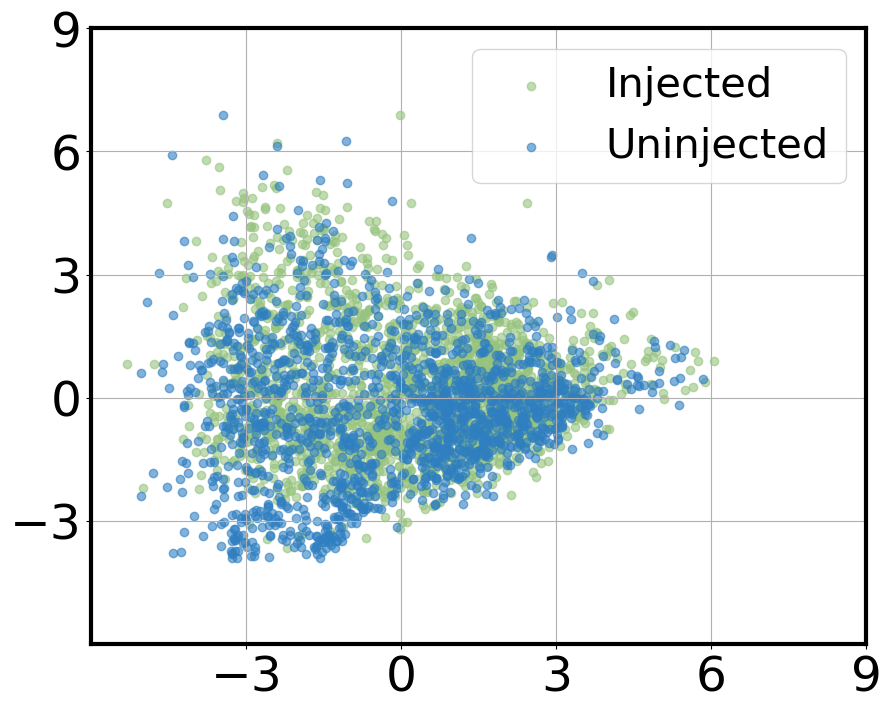

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib

data_df = Carbidopa_exp_data[columns]

sampled_data_df = data_df.sample(frac=0.2, random_state=42)

X = sampled_data_df.iloc[:, :-1].values
labels = sampled_data_df.iloc[:, -1].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

matplotlib.rcParams['font.size'] = 35  
plt.rcParams['axes.linewidth'] = 3

plt.figure(figsize=(10, 8))
for label in np.unique(labels):
    if label == 'Injected':
        color = '#96C37D'  
    else:
        color = '#2F7FC1'  
    plt.scatter(X_pca[labels == label, 0], X_pca[labels == label, 1], alpha=0.6, label=f'{label}', color=color)
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA Visualization of Data by Label')


plt.xlim(-6, 9)  
plt.ylim(-6, 9)  

plt.xticks([-3, 0, 3, 6, 9])  
plt.yticks([-3, 0, 3, 6, 9])  
plt.legend(fontsize=30)
plt.grid(True)
plt.show()

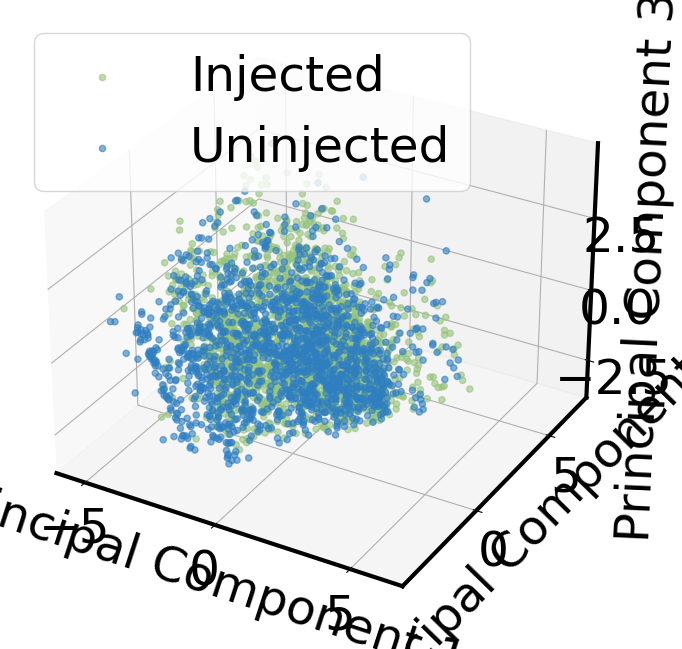

In [36]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D  # 导入3D绘图模块
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# import pandas as pd
# import matplotlib

# # 假设你的数据存储在data_df中，每行是一个数据点，最后一列是标签
# data_df = Carbidopa_exp_data[columns]

# # 采样十分之一的数据
# sampled_data_df = data_df.sample(frac=0.2, random_state=42)

# # 将特征和标签分开
# X = sampled_data_df.iloc[:, :-1].values
# labels = sampled_data_df.iloc[:, -1].values

# # 标准化数据
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # 使用PCA进行降维，降至3维以便可视化
# pca = PCA(n_components=3)  # 修改为3维
# X_pca = pca.fit_transform(X_scaled)

# # matplotlib.rcParams['font.size'] = 35  # 根据需要调整字号
# # plt.rcParams['axes.linewidth'] = 3

# # 创建一个3D散点图来展示降维后的数据，根据标签进行着色
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')  # 创建3D坐标轴

# for label in np.unique(labels):
#     if label == 'Injected':
#         color = '#96C37D'  # 标签为0的数据点使用绿色
#     else:
#         color = '#2F7FC1'  # 标签为1的数据点使用蓝色
#     ax.scatter(X_pca[labels == label, 0], X_pca[labels == label, 1], X_pca[labels == label, 2], alpha=0.6, label=f'{label}', color=color)

# # 设置 x、y、z 轴的范围
# # ax.set_xlim(-6, 9)  # 替换为你想要的 x 轴范围
# # ax.set_ylim(-6, 9)  # 替换为你想要的 y 轴范围
# # ax.set_zlim(-6, 9)  # 替换为你想要的 z 轴范围

# # 设置 x、y、z 轴的刻度
# # ax.set_xticks([-3, 0, 3, 6, 9])  # 替换为你想要的 x 轴刻度
# # ax.set_yticks([-3, 0, 3, 6, 9])  # 替换为你想要的 y 轴刻度
# # ax.set_zticks([-3, 0, 3, 6, 9])  # 替换为你想要的 z 轴刻度

# # 设置 x、y、z 轴标签
# ax.set_xlabel('Principal Component 1')
# ax.set_ylabel('Principal Component 2')
# ax.set_zlabel('Principal Component 3')

# # 设置图例位置和字号
# ax.legend(loc='upper left')

# plt.grid(True)
# plt.show()


In [15]:
# preg_data = pd.read_excel('preg_data/including_rejected_calls/0729.xlsx', engine='openpyxl')
# no_preg_data_1 = pd.read_excel('preg_data/including_rejected_calls/0725.xlsx', engine='openpyxl')
# no_preg_data_2 = pd.read_excel('preg_data/including_rejected_calls/0809.xlsx', engine='openpyxl')

# preg_data['label'] = 'Day 2'
# no_preg_data_1['label'] = 'Day 1'
# no_preg_data_2['label'] = 'Day 3'

# preg_exp_data = pd.concat([preg_data, no_preg_data_1, no_preg_data_2])

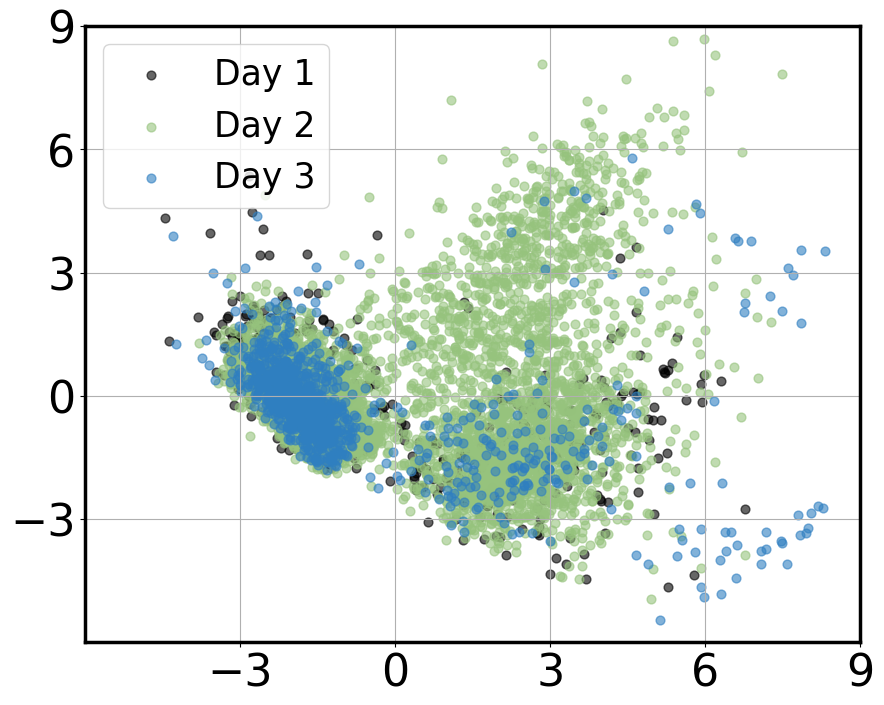

In [91]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# import pandas as pd
# import matplotlib

# # 假设你的数据存储在data_df中，每行是一个数据点，最后一列是标签
# data_df = preg_exp_data[columns]

# # 采样十分之一的数据
# sampled_data_df = data_df.sample(frac=1, random_state=42)

# # 将特征和标签分开
# X = sampled_data_df.iloc[:, :-1].values
# labels = sampled_data_df.iloc[:, -1].values

# # 标准化数据
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # 使用PCA进行降维，降至2维以便可视化
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled)

# matplotlib.rcParams['font.size'] = 32  # 根据需要调整字号
# # 设置全局的绘图参数，包括边框线宽
# plt.rcParams['axes.linewidth'] = 2.5

# # 创建一个散点图来展示降维后的数据，根据标签进行着色
# plt.figure(figsize=(10, 8))
# for label in np.unique(labels):
#     if label == 'Day 1':
#         color = 'black'  # 标签为0的数据点使用红色
#     elif label == 'Day 2':
#         color = '#96C37D'
#     else:
#         color = '#2F7FC1'  # 标签为1的数据点使用蓝色
#     plt.scatter(X_pca[labels == label, 0], X_pca[labels == label, 1], alpha=0.6, label=f'{label}', color=color, s=40)
# # plt.xlabel('Principal Component 1')
# # plt.ylabel('Principal Component 2')
# # plt.title('PCA Visualization of Data by Label')

# # 设置 x 轴和 y 轴的范围
# plt.xlim(-6, 9)  # 替换为你想要的 x 轴范围
# plt.ylim(-6, 9)  # 替换为你想要的 y 轴范围

# # 设置 x 轴和 y 轴的刻度
# plt.xticks([-3, 0, 3, 6, 9])  # 替换为你想要的 x 轴刻度
# plt.yticks([-3, 0, 3, 6, 9])  # 替换为你想要的 y 轴刻度

# plt.legend(fontsize=25)

# plt.grid(True)
# plt.show()